In [88]:
import requests
import json
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [18]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [19]:
# API Identifiers

shiftfc = '1057538'
phil = '171801979'
kyler = '1118087424'
raf = '295291323'
matt = '648325014'

In [171]:
# API Call for Data

url = 'https://proclubs.ea.com/api/fifa/clubs/matches'

res = requests.get(
    url,
    params={
        'clubIds': '1057538',
        'platform': 'ps4',
        'matchType': 'gameType9',
        'maxResultCount': '68'
    },
    headers={
        'Referer': 'https://proclubs.ea.com/api-docs/index.html?url=/swagger.json'
    }
)
print(res.url)
results_df = pd.DataFrame(res.json())
results_df.count(), results_df.columns

https://proclubs.ea.com/api/fifa/clubs/matches?clubIds=1057538&platform=ps4&matchType=gameType9&maxResultCount=68


(matchId      68
 timestamp    68
 timeAgo      68
 clubs        68
 players      68
 aggregate    68
 dtype: int64,
 Index(['matchId', 'timestamp', 'timeAgo', 'clubs', 'players', 'aggregate'], dtype='object'))

In [154]:
df = pd.json_normalize(res.json())
print(df.columns.shape)
df.head()

(10528,)


,matchId,timestamp,timeAgo.number,timeAgo.unit,clubs.1057538.gameNumber,clubs.1057538.goals,clubs.1057538.goalsAgainst,clubs.1057538.losses,clubs.1057538.result,clubs.1057538.score,...,aggregate.371788.realtimeidle,aggregate.371788.redcards,aggregate.371788.saves,aggregate.371788.SCORE,aggregate.371788.shots,aggregate.371788.tackleattempts,aggregate.371788.tacklesmade,aggregate.371788.vproattr,aggregate.371788.vprohackreason,aggregate.371788.wins
0,53055042340442,1611284494,18,hours,0,1,4,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53055233410199,1611283392,18,hours,9,7,2,0,16385,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53050534710308,1611282454,19,hours,8,0,2,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53041977400105,1611281457,19,hours,7,0,0,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,52155178470322,1611111791,2,days,6,0,5,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleanse

In [73]:
# Keep only the relevant columns and clean up names for easy access

fixed_df = df.filter(regex=('matchId|clubs.1057538|aggregate.1057538|' + raf )+ '|'  + matt + '|' + phil + '|' + kyler)
fixed_df = fixed_df.filter(regex=('^((?!details).)*$'))
fixed_df.columns = fixed_df.columns \
    .str.replace('players.' + shiftfc + '.' + raf, 'raf', regex=True) \
    .str.replace('players.' + shiftfc + '.' + kyler, 'kyler', regex=True) \
    .str.replace('players.' + shiftfc + '.' + matt, 'matt', regex=True) \
    .str.replace('players.' + shiftfc + '.' + phil, 'phil', regex=True) \
    .str.replace('clubs.1057538', 'shiftfc', regex=True) \
    .str.replace('aggregate.1057538', 'totals', regex=True)

fixed_df = fixed_df.set_index('matchId')
fixed_df.head()

,shiftfc.gameNumber,shiftfc.goals,shiftfc.goalsAgainst,shiftfc.losses,shiftfc.result,shiftfc.score,shiftfc.season_id,shiftfc.TEAM,shiftfc.ties,shiftfc.winnerByDnf,...,totals.realtimeidle,totals.redcards,totals.saves,totals.SCORE,totals.shots,totals.tackleattempts,totals.tacklesmade,totals.vproattr,totals.vprohackreason,totals.wins
matchId,,,,,,,,,,,,,,,,,,,,,
53055042340442,0,1,4,1,2,1,21,99110304,0,0,...,88,0,0,4,9,30,10,0,32,0
53055233410199,9,7,2,0,16385,7,20,99110304,0,1,...,50,0,0,28,11,47,17,0,32,4
53050534710308,8,0,2,1,2,0,20,99110304,0,0,...,31,0,0,0,11,40,19,0,32,0
53041977400105,7,0,0,0,4,0,20,99110304,1,0,...,47,0,0,0,8,22,10,0,32,0
52155178470322,6,0,5,1,2,0,20,99110518,0,0,...,43,0,0,0,4,22,6,0,32,0


In [74]:
# Find games where stats seem incomplete
outlier_games = fixed_df.filter(regex='shiftfc.goals|passesmade|result')[fixed_df['totals.passesmade'] < 40]
outlier_games

,shiftfc.goals,shiftfc.goalsAgainst,shiftfc.result,phil.passesmade,raf.passesmade,matt.passesmade,kyler.passesmade,totals.passesmade
matchId,,,,,,,,
46120771320478,1,5,10,0,0,0,2,2
41180134580393,4,0,16385,22,2,3,NaN,27
41174451980127,0,3,10,2,0,0,NaN,2
39950618340321,5,0,16385,24,3,7,3,37


In [77]:
# Drop outlier games and we have the final form of dataframe
final_df = fixed_df.drop(outlier_games.index)
print(final_df.shape)
final_df.head()

(64, 130)


,shiftfc.gameNumber,shiftfc.goals,shiftfc.goalsAgainst,shiftfc.losses,shiftfc.result,shiftfc.score,shiftfc.season_id,shiftfc.TEAM,shiftfc.ties,shiftfc.winnerByDnf,...,totals.realtimeidle,totals.redcards,totals.saves,totals.SCORE,totals.shots,totals.tackleattempts,totals.tacklesmade,totals.vproattr,totals.vprohackreason,totals.wins
matchId,,,,,,,,,,,,,,,,,,,,,
53055042340442,0,1,4,1,2,1,21,99110304,0,0,...,88,0,0,4,9,30,10,0,32,0
53055233410199,9,7,2,0,16385,7,20,99110304,0,1,...,50,0,0,28,11,47,17,0,32,4
53050534710308,8,0,2,1,2,0,20,99110304,0,0,...,31,0,0,0,11,40,19,0,32,0
53041977400105,7,0,0,0,4,0,20,99110304,1,0,...,47,0,0,0,8,22,10,0,32,0
52155178470322,6,0,5,1,2,0,20,99110518,0,0,...,43,0,0,0,4,22,6,0,32,0


# Compiling all players' games as the "ANY"

In [79]:
matt_anys = final_df.loc[final_df['matt.passesmade'].fillna(0).astype(int) > 30].filter(regex='matt')['matt.passesmade'].index
raf_anys = final_df.loc[final_df['raf.passesmade'].fillna(0).astype(int) > 30].filter(regex='raf')['raf.passesmade'].index
phil_anys = final_df.loc[final_df['phil.passesmade'].fillna(0).astype(int) > 30].filter(regex='phil')['phil.passesmade'].index

print(len(matt_anys), len(raf_anys), len(phil_anys))

15 20 29


### Putting together overview stats for each ANY

In [155]:
any_games_list = [raf_anys, phil_anys, matt_anys]
players = ['raf', 'phil', 'matt']
any_stats = {}
any_goals_stats = {}
any_passing_stats = {}
any_goals_stats = {}

for i in range(0, len(players)):
    any_games = any_games_list[i]
    player = players[i]    
    
    dnfs = final_df.loc[any_games].filter(regex='shiftfc.winnerByDnf')['shiftfc.winnerByDnf'].astype(int)
    wins = final_df.loc[any_games].filter(regex='shiftfc.wins')['shiftfc.wins'].astype(int)
    ties = final_df.loc[any_games].filter(regex='shiftfc.ties')['shiftfc.ties'].astype(int)
    losses = final_df.loc[any_games].filter(regex='shiftfc.losses')['shiftfc.losses'].astype(int)
    goals_scored = final_df.loc[any_games].filter(regex='shiftfc.goals')['shiftfc.goals'].astype(int)
    goals_against = final_df.loc[any_games].filter(regex='shiftfc.goalsAgainst')['shiftfc.goalsAgainst'].astype(int)
    pass_attempts = final_df.loc[any_games].filter(regex=player + '.passattempts')[player + '.passattempts'].astype(int)
    passes_made = final_df.loc[any_games].filter(regex=player + '.passesmade')[player + '.passesmade'].astype(int)
    tackle_attempts = final_df.loc[any_games].filter(regex=player + '.tackleattempts')[player + '.tackleattempts'].astype(int)
    tackles_made = final_df.loc[any_games].filter(regex=player + '.tacklesmade')[player + '.tacklesmade'].astype(int)
    
    # Totals
    total_games_played = len(any_games)
    total_dnfs = dnfs.sum()
    total_wins = wins.sum()
    total_ties = ties.sum()
    total_losses = losses.sum()
    total_goals_scored = goals_scored.sum()
    total_goals_against = goals_against.sum()
    total_pass_attempts = pass_attempts.sum()
    total_passes_made = passes_made.sum()
    total_tackle_attempts = tackle_attempts.sum()
    total_tackles_made = tackles_made.sum()
    
    # Means
    mean_goals_scored = round(goals_scored.mean(), 2)
    mean_goals_against = round(goals_against.mean(), 2)
    mean_pass_attempts = round(pass_attempts.mean(), 2)
    mean_passes_made = round(passes_made.mean(), 2)
    mean_tackle_attempts = round(tackle_attempts.mean(), 2)
    mean_tackles_made = round(tackles_made.mean(), 2)
    
    # Ratios
    ratio_goals = (total_goals_scored / total_goals_against).round(2)
    ratio_passes = (total_passes_made / total_pass_attempts).round(2)
    ratio_tackles = (total_tackles_made / total_tackle_attempts).round(2)
    
    any_stats[player] = [
        total_games_played, 
        total_dnfs, total_wins, total_ties, total_losses,
        total_goals_scored, total_goals_against,
        total_pass_attempts, total_passes_made, 
        total_tackle_attempts, total_tackles_made,
        mean_goals_scored, mean_goals_against,
        mean_pass_attempts, mean_passes_made,
        mean_tackle_attempts, mean_tackles_made,
        ratio_goals, ratio_passes, ratio_tackles
    ]

    
all_any_stats = pd.DataFrame(data=any_stats, 
             index=[
                 'total_games_played', 
                 'total_dnfs', 'total_wins', 'total_ties', 'total_losses',
                 'total_goals_scored', 'total_goals_against',
                 'total_pass_attempts', 'total_passes_made', 
                 'total_tackle_attempts', 'total_tackles_made',
                 'mean_goals_scored', 'mean_goals_against',
                 'mean_pass_attempts', 'mean_passes_made',
                 'mean_tackle_attempts', 'mean_tackles_made',
                 'ratio_goals', 'ratio_passes', 'ratio_tackles'
             ]
            )

all_any_stats

,raf,phil,matt
total_games_played,20.00,29.00,15.00
total_dnfs,2.00,2.00,0.00
total_wins,6.00,11.00,3.00
total_ties,4.00,6.00,2.00
total_losses,10.00,12.00,10.00
total_goals_scored,49.00,72.00,24.00
total_goals_against,51.00,70.00,42.00
total_pass_attempts,1485.00,2321.00,1490.00
total_passes_made,1149.00,1826.00,1166.00
total_tackle_attempts,307.00,554.00,148.00


### Plot overview for ANY

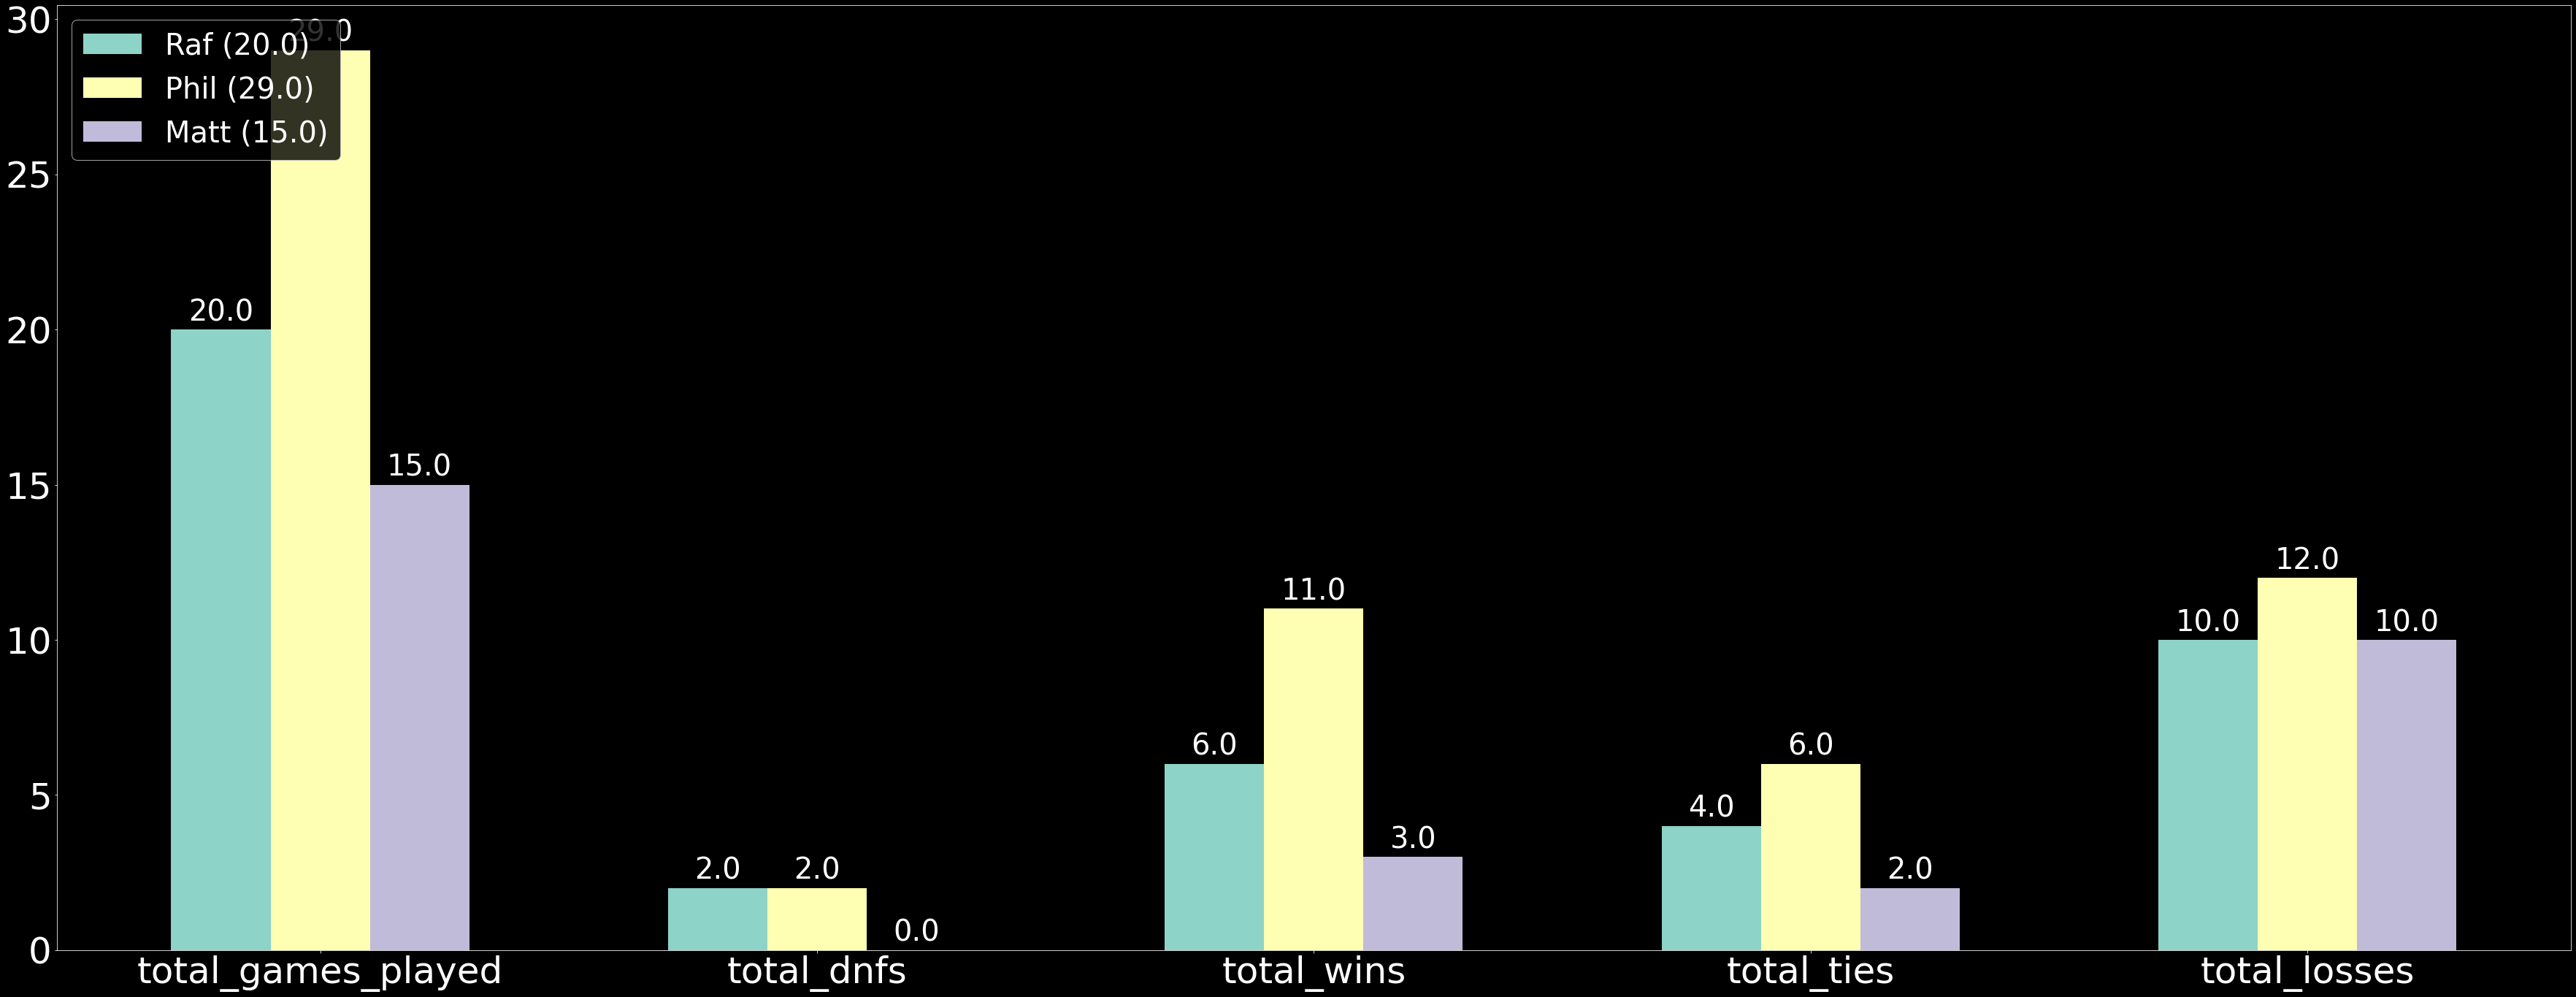

In [150]:
raf_label = 'Raf (' + all_any_stats.loc['total_games_played']['raf'].astype(str) + ')'
phil_label = 'Phil (' + all_any_stats.loc['total_games_played']['phil'].astype(str) + ')'
matt_label = 'Matt (' + all_any_stats.loc['total_games_played']['matt'].astype(str) + ')'
rel_stats = all_any_stats.loc[['total_games_played', 'total_dnfs', 'total_wins', 'total_ties', 'total_losses']]

x = np.arange(len(rel_stats.index))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots(figsize = (50,20))
plt.rcParams["font.size"] = "40"
plt.tick_params(labelsize=50)
rects1 = ax.bar(x - width, rel_stats['raf'], width, label=raf_label)
rects2 = ax.bar(x,  rel_stats['phil'], width, label=phil_label)
rects3 = ax.bar(x + width,  rel_stats['matt'], width, label=matt_label)

ax.set_title('')
ax.set_xticks(x)
ax.set_xticklabels(rel_stats.index)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

### Plot Goals For and Against for ANY

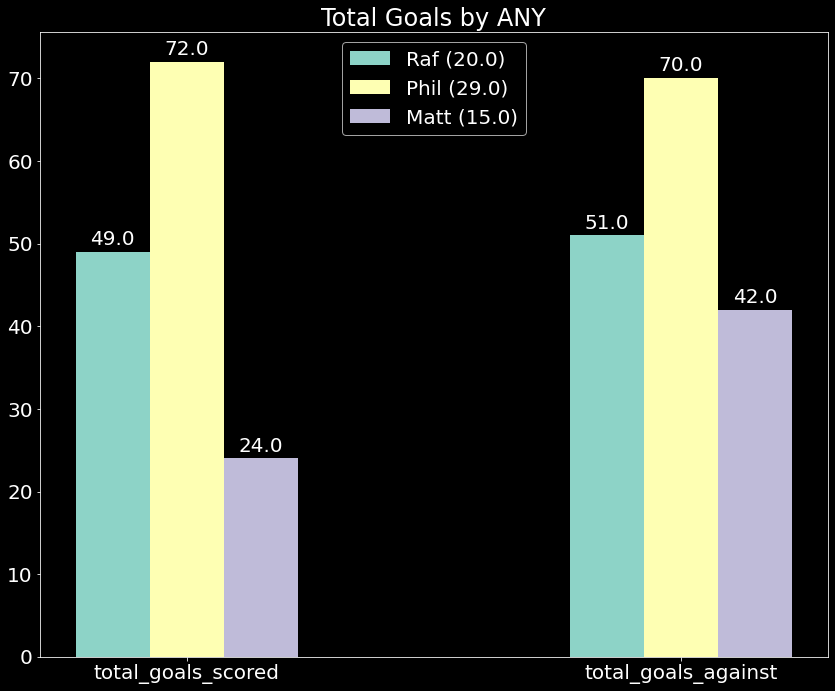

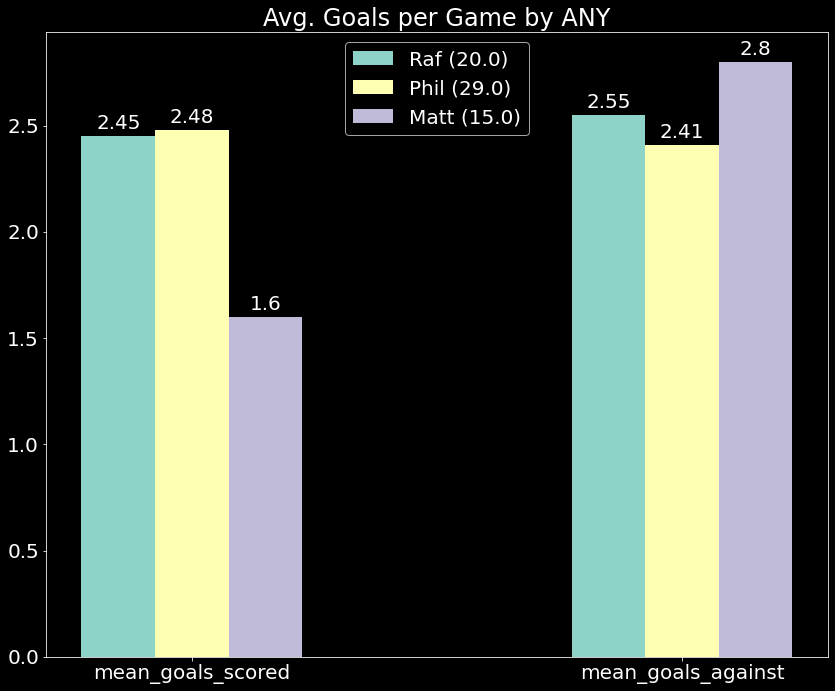

In [90]:
rel_stats = all_any_stats.loc[['total_goals_scored', 'total_goals_against']]

x = np.arange(len(rel_stats.index))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize = (12,10))
plt.rcParams["font.size"] = "20"
plt.rcParams["legend.loc"] = 'upper center'
plt.tick_params(labelsize=20)
rects1 = ax.bar(x - width, rel_stats['raf'], width, label=raf_label)
rects2 = ax.bar(x,  rel_stats['phil'], width, label=phil_label)
rects3 = ax.bar(x + width,  rel_stats['matt'], width, label=matt_label)

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
ax.set_title('Total Goals by ANY')
ax.set_xticks(x)
ax.set_xticklabels(rel_stats.index)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

##############

rel_stats = all_any_stats.loc[['mean_goals_scored', 'mean_goals_against']]

x = np.arange(len(rel_stats.index))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize = (12,10))
plt.rcParams["font.size"] = "20"
rects1 = ax.bar(x - width, rel_stats['raf'], width, label=raf_label)
rects2 = ax.bar(x,  rel_stats['phil'], width, label=phil_label)
rects3 = ax.bar(x + width,  rel_stats['matt'], width, label=matt_label)

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
ax.set_title('Avg. Goals per Game by ANY')
ax.set_xticks(x)
ax.set_xticklabels(rel_stats.index)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()



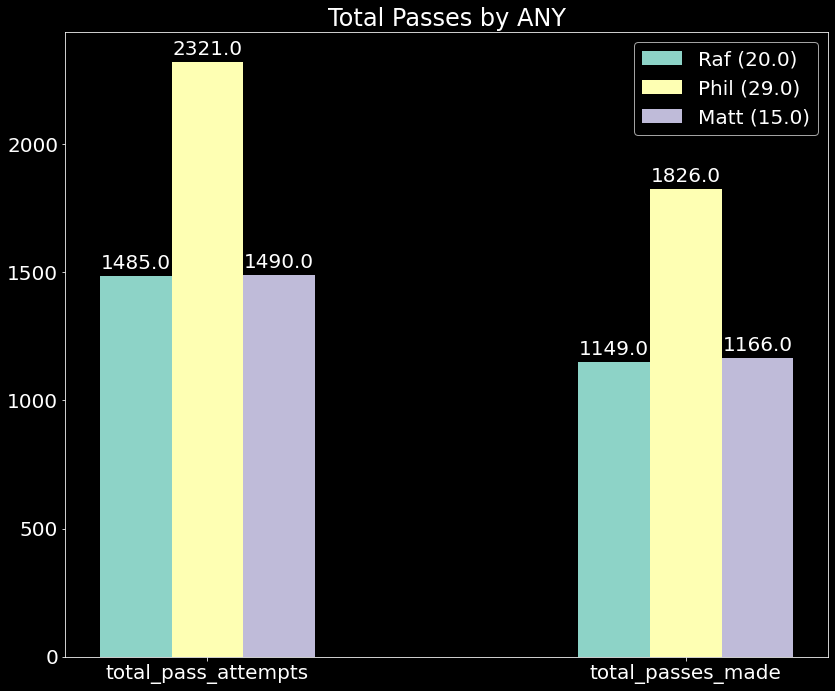

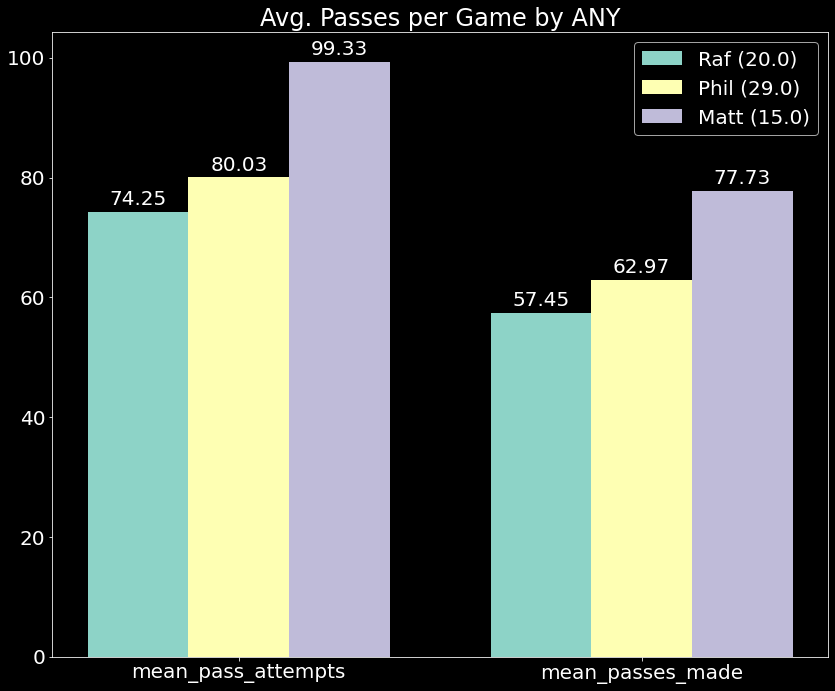

In [92]:
rel_stats = all_any_stats.loc[['total_pass_attempts', 'total_passes_made']]

x = np.arange(len(rel_stats.index))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize = (12,10))
plt.rcParams["font.size"] = "20"
plt.rcParams["legend.loc"] = 'upper right'

rects1 = ax.bar(x - width, rel_stats['raf'], width, label=raf_label)
rects2 = ax.bar(x,  rel_stats['phil'], width, label=phil_label)
rects3 = ax.bar(x + width,  rel_stats['matt'], width, label=matt_label)

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
ax.set_title('Total Passes by ANY')
ax.set_xticks(x)
ax.set_xticklabels(rel_stats.index)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

rel_stats = all_any_stats.loc[['mean_pass_attempts', 'mean_passes_made']]

x = np.arange(len(rel_stats.index))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize = (12,10))
plt.rcParams["font.size"] = "20"
rects1 = ax.bar(x - width, rel_stats['raf'], width, label=raf_label)
rects2 = ax.bar(x,  rel_stats['phil'], width, label=phil_label)
rects3 = ax.bar(x + width,  rel_stats['matt'], width, label=matt_label)

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
ax.set_title('Avg. Passes per Game by ANY')
ax.set_xticks(x)
ax.set_xticklabels(rel_stats.index)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

### Plot Goal, Pass, Tackle Ratios for each ANY

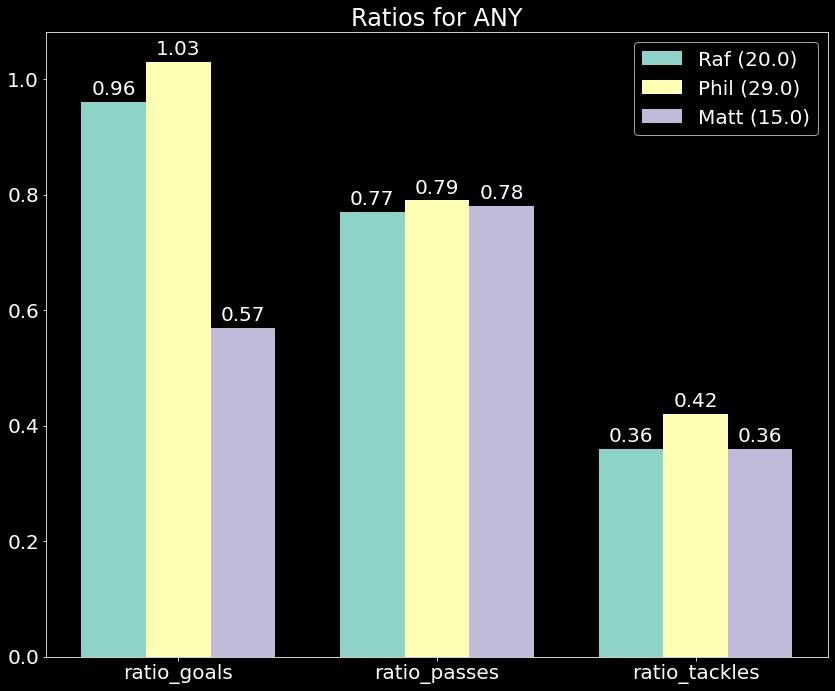

In [95]:
rel_stats = all_any_stats.loc[['ratio_goals', 'ratio_passes', 'ratio_tackles']]

x = np.arange(len(rel_stats.index))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize = (12,10))
plt.rcParams["font.size"] = "20"
plt.rcParams["legend.loc"] = 'upper right'

rects1 = ax.bar(x - width, rel_stats['raf'], width, label=raf_label)
rects2 = ax.bar(x,  rel_stats['phil'], width, label=phil_label)
rects3 = ax.bar(x + width,  rel_stats['matt'], width, label=matt_label)

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
ax.set_title('Ratios for ANY')
ax.set_xticks(x)
ax.set_xticklabels(rel_stats.index)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

# Pros during each ANY
### Explores individual pro stats while playing for a specific ANY

In [99]:
final_df.loc[any_games].filter(regex=player).columns

Index(['phil.assists', 'phil.cleansheetsany', 'phil.cleansheetsdef',
       'phil.cleansheetsgk', 'phil.goals', 'phil.goalsconceded', 'phil.losses',
       'phil.mom', 'phil.passattempts', 'phil.passesmade', 'phil.pos',
       'phil.rating', 'phil.realtimegame', 'phil.realtimeidle',
       'phil.redcards', 'phil.saves', 'phil.SCORE', 'phil.shots',
       'phil.tackleattempts', 'phil.tacklesmade', 'phil.vproattr',
       'phil.vprohackreason', 'phil.wins', 'phil.playername'],
      dtype='object')

### Putting together overview stats for each pro

In [161]:
anys = [matt_anys, phil_anys, raf_anys]
players = ['raf', 'matt', 'kyler', 'phil']
player_stats = {}
dfs = []

for any_games in anys:
    for i in range(0, len(players)):
        player = players[i]    
        player_games = final_df.loc[any_games].filter(regex=player).dropna()

        goals = player_games.filter(regex='.goals$')[player + '.goals'].astype(int)
        shots = player_games.filter(regex='.shots')[player + '.shots'].astype(int)
        assists = player_games.filter(regex='.assists')[player + '.assists'].astype(int)
        passattempts = player_games.filter(regex='.passattempts')[player + '.passattempts'].astype(int)
        passesmade = player_games.filter(regex='.passesmade')[player + '.passesmade'].astype(int)
        tacklesmade = player_games.filter(regex='.tacklesmade')[player + '.tacklesmade'].astype(int)
        tackleattempts = player_games.filter(regex='.tackleattempts')[player + '.tackleattempts'].astype(int)
        rating = player_games.filter(regex='.rating')[player + '.rating'].astype(float)
        mom = player_games.filter(regex='.mom')[player + '.mom'].astype(int)

        # Total
        total_games_played = len(player_games)
        total_goals = goals.sum()
        total_shots = shots.sum()
        total_assists = assists.sum()
        total_passattempts = passattempts.sum()
        total_passesmade = passesmade.sum()
        total_tacklesmade = tacklesmade.sum()
        total_tackleattempts = tackleattempts.sum()
        total_mom = mom.sum()

        # Mean
        mean_goals = round(goals.mean(), 2)
        mean_shots = round(shots.mean(), 2)
        mean_assists = round(assists.mean(), 2)
        mean_passattempts = round(passattempts.mean(), 2)
        mean_passesmade = round(passesmade.mean(), 2)
        mean_tacklesmade = round(tacklesmade.mean(), 2)
        mean_tackleattempts = round(tackleattempts.mean(), 2)
        mean_rating = round(rating.mean(), 2)
        
        # Ratios
        ratio_goals = (total_goals / total_shots).round(2)
        ratio_passes = (total_passesmade / total_passattempts).round(2)
        ratio_tackles = (total_tacklesmade / total_tackleattempts).round(2)

        player_stats[player] = [
            total_games_played, 
            total_goals, total_shots, total_assists,
            total_passattempts, total_passesmade, total_mom,
            mean_goals, mean_shots, 
            mean_assists, mean_passattempts, mean_passesmade, mean_rating,
            ratio_goals, ratio_passes, ratio_tackles
        ]
    
    # Holds a list of dataframes -- each dataframe are the stats specifically under one person's ANY
    dfs.append(
        pd.DataFrame(
            data=player_stats, 
            index=[
                'total_games_played', 
                'total_goals', 'total_shots', 'total_assists',
                'total_passattempts', 'total_passesmade', 'total_mom',
                'mean_goals', 'mean_shots', 
                'mean_assists', 'mean_passattempts', 'mean_passesmade', 'mean_rating',
                'ratio_goals', 'ratio_passes', 'ratio_tackles'
            ]
        )
    )

# At index 0, we have everybody's stats for Matt's ANY
dfs[0]

,raf,matt,kyler,phil
total_games_played,14.00,15.00,10.00,13.00
total_goals,16.00,1.00,2.00,5.00
total_shots,38.00,35.00,9.00,17.00
total_assists,4.00,11.00,3.00,1.00
total_passattempts,161.00,1490.00,114.00,131.00
total_passesmade,126.00,1166.00,76.00,96.00
total_mom,5.00,0.00,0.00,0.00
mean_goals,1.14,0.07,0.20,0.38
mean_shots,2.71,2.33,0.90,1.31
mean_assists,0.29,0.73,0.30,0.08


### Ratios for Individual Pros under Selected ANY
##### * Must change labels

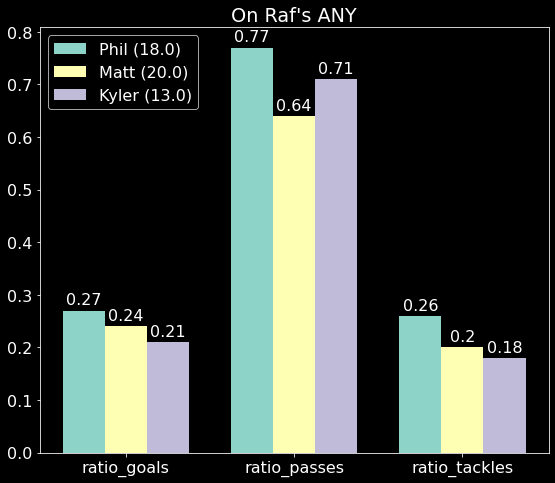

In [114]:
# any_dfs = dfs[0] # Matt
# any_dfs = dfs[1] # Phil
any_dfs = dfs[2] # Raf

rel_stats = any_dfs.loc[['ratio_goals', 'ratio_passes', 'ratio_tackles']]

# raf_label = 'Raf (' + any_dfs.loc['total_games_played']['raf'].astype(str) + ')'
phil_label = 'Phil (' + any_dfs.loc['total_games_played']['phil'].astype(str) + ')'
matt_label = 'Matt (' + any_dfs.loc['total_games_played']['matt'].astype(str) + ')'
kyler_label = 'Kyler (' + any_dfs.loc['total_games_played']['kyler'].astype(str) + ')'

x = np.arange(len(rel_stats.index))
width = 0.25
fig, ax = plt.subplots(figsize = (8,7))
plt.rcParams["font.size"] = "16"
plt.rcParams["legend.loc"] = 'upper left'

rects1 = ax.bar(x - width, rel_stats['phil'], width, label=phil_label)
rects2 = ax.bar(x,  rel_stats['matt'], width, label=matt_label)
rects3 = ax.bar(x + width,  rel_stats['kyler'], width, label=kyler_label)

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
ax.set_title('On Raf\'s ANY')
ax.set_xticks(x)
ax.set_xticklabels(rel_stats.index)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

### Totals for Individual Pros under Selected ANY
##### * Must change labels

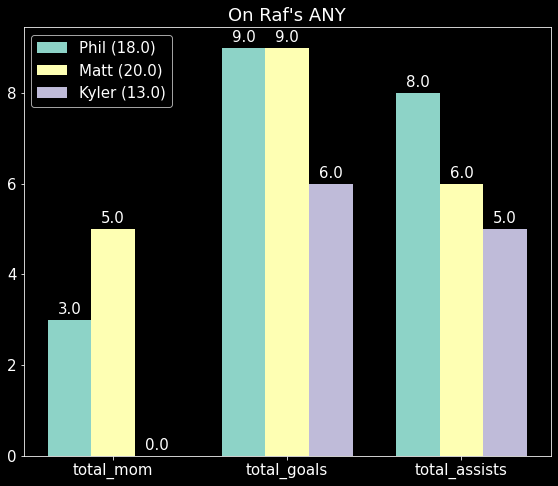

In [118]:
# any_dfs = dfs[0] # Matt
# any_dfs = dfs[1] # Phil
any_dfs = dfs[2] # Raf

rel_stats = any_dfs.loc[['total_mom', 'total_goals', 'total_assists']]

raf_label = 'Raf (' + any_dfs.loc['total_games_played']['raf'].astype(str) + ')'
phil_label = 'Phil (' + any_dfs.loc['total_games_played']['phil'].astype(str) + ')'
matt_label = 'Matt (' + any_dfs.loc['total_games_played']['matt'].astype(str) + ')'
kyler_label = 'Kyler (' + any_dfs.loc['total_games_played']['kyler'].astype(str) + ')'

x = np.arange(len(rel_stats.index))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize = (8,7))
plt.rcParams["font.size"] = "15"
plt.rcParams["legend.loc"] = 'upper left'

rects1 = ax.bar(x - width, rel_stats['phil'], width, label=phil_label)
rects2 = ax.bar(x,  rel_stats['matt'], width, label=matt_label)
rects3 = ax.bar(x + width,  rel_stats['kyler'], width, label=kyler_label)

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
ax.set_title('On Raf\'s ANY')
ax.set_xticks(x)
ax.set_xticklabels(rel_stats.index)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

### Averages for Individual Pros under Selected ANY
##### * Must change labels

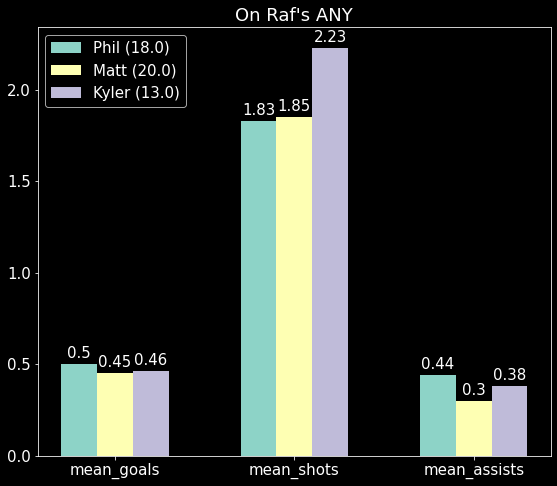

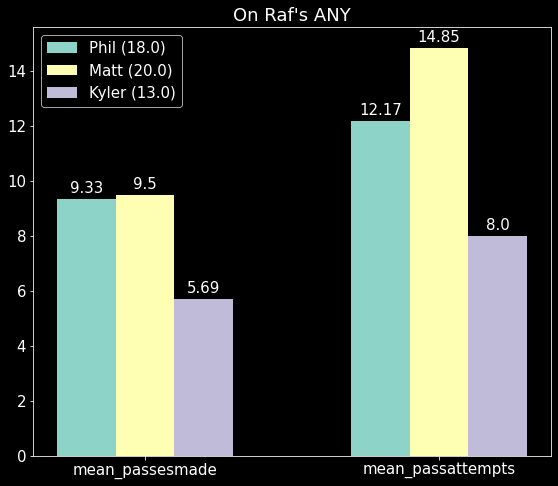

In [165]:
# any_dfs = dfs[0] # Matt
# any_dfs = dfs[1] # Phil
any_dfs = dfs[2] # Raf

rel_stats = any_dfs.loc[['mean_goals', 'mean_shots', 'mean_assists']]

raf_label = 'Raf (' + any_dfs.loc['total_games_played']['raf'].astype(str) + ')'
phil_label = 'Phil (' + any_dfs.loc['total_games_played']['phil'].astype(str) + ')'
matt_label = 'Matt (' + any_dfs.loc['total_games_played']['matt'].astype(str) + ')'
kyler_label = 'Kyler (' + any_dfs.loc['total_games_played']['kyler'].astype(str) + ')'

x = np.arange(len(rel_stats.index))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize = (8,7))
plt.rcParams["font.size"] = "15"
plt.rcParams["legend.loc"] = 'upper left'

rects1 = ax.bar(x - width, rel_stats['phil'], width, label=phil_label)
rects2 = ax.bar(x,  rel_stats['matt'], width, label=matt_label)
rects3 = ax.bar(x + width,  rel_stats['kyler'], width, label=kyler_label)

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
ax.set_title('On Raf\'s ANY')
ax.set_xticks(x)
ax.set_xticklabels(rel_stats.index)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

rel_stats = any_dfs.loc[['mean_passesmade', 'mean_passattempts']]

x = np.arange(len(rel_stats.index))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize = (8,7))
plt.rcParams["font.size"] = "15"
plt.rcParams["legend.loc"] = 'upper left'

rects1 = ax.bar(x - width, rel_stats['phil'], width, label=phil_label)
rects2 = ax.bar(x,  rel_stats['matt'], width, label=matt_label)
rects3 = ax.bar(x + width,  rel_stats['kyler'], width, label=kyler_label)

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
ax.set_title('On Raf\'s ANY')
ax.set_xticks(x)
ax.set_xticklabels(rel_stats.index)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

# Pro stats

In [170]:
# Grabbing only rows pertaining to individual pro games and indiviuals

matt_pro = final_df.loc[final_df['matt.passesmade'].fillna(30).astype(int) < 30].filter(regex='matt')['matt.passesmade'].index
raf_pro = final_df.loc[final_df['raf.passesmade'].fillna(30).astype(int) < 30].filter(regex='raf')['raf.passesmade'].index
phil_pro = final_df.loc[final_df['phil.passesmade'].fillna(30).astype(int) < 30].filter(regex='phil')['phil.passesmade'].index
kyler_pro = final_df.loc[final_df['kyler.passesmade'].fillna(30).astype(int) < 30].filter(regex='kyler')['kyler.passesmade'].index
print( len(matt_pro), len(raf_pro), len(phil_pro), len(kyler_pro))

49 41 31 42


In [129]:
final_df.loc[raf_pro].filter(regex='raf').columns

Index(['raf.assists', 'raf.cleansheetsany', 'raf.cleansheetsdef',
       'raf.cleansheetsgk', 'raf.goals', 'raf.goalsconceded', 'raf.losses',
       'raf.mom', 'raf.passattempts', 'raf.passesmade', 'raf.pos',
       'raf.rating', 'raf.realtimegame', 'raf.realtimeidle', 'raf.redcards',
       'raf.saves', 'raf.SCORE', 'raf.shots', 'raf.tackleattempts',
       'raf.tacklesmade', 'raf.vproattr', 'raf.vprohackreason', 'raf.wins',
       'raf.playername'],
      dtype='object')

### Compiling all stats for each pro

In [130]:
pros = [matt_pro, raf_pro, phil_pro, kyler_pro]
players = ['matt', 'raf', 'phil', 'kyler']
pro_stats = {}
form = {}
dfs = []

for i in range(0, len(pros)):
    player = players[i]
    pro = pros[i]
    player_games = final_df.loc[pro].filter(regex=player).dropna()

    goals = player_games.filter(regex='.goals$')[player + '.goals'].astype(int)
    shots = player_games.filter(regex='.shots')[player + '.shots'].astype(int)
    assists = player_games.filter(regex='.assists')[player + '.assists'].astype(int)
    passattempts = player_games.filter(regex='.passattempts')[player + '.passattempts'].astype(int)
    passesmade = player_games.filter(regex='.passesmade')[player + '.passesmade'].astype(int)
    tacklesmade = player_games.filter(regex='.tacklesmade')[player + '.tacklesmade'].astype(int)
    tackleattempts = player_games.filter(regex='.tackleattempts')[player + '.tackleattempts'].astype(int)
    rating = player_games.filter(regex='.rating')[player + '.rating'].astype(float)
    mom = player_games.filter(regex='.mom')[player + '.mom'].astype(int)
    wins = player_games.filter(regex='.wins')[player + '.wins'].astype(int)
    losses = player_games.filter(regex='.losses')[player + '.losses'].astype(int)

    # Total
    total_games_played = len(player_games)
    total_wins = wins.sum()
    total_losses = losses.sum()
    total_goals = goals.sum()
    total_shots = shots.sum()
    total_assists = assists.sum()
    total_passattempts = passattempts.sum()
    total_passesmade = passesmade.sum()
    total_tacklesmade = tacklesmade.sum()
    total_tackleattempts = tackleattempts.sum()
    total_mom = mom.sum()

    # Mean
    mean_goals = round(goals.mean(), 2)
    mean_shots = round(shots.mean(), 2)
    mean_assists = round(assists.mean(), 2)
    mean_passattempts = round(passattempts.mean(), 2)
    mean_passesmade = round(passesmade.mean(), 2)
    mean_tacklesmade = round(tacklesmade.mean(), 2)
    mean_tackleattempts = round(tackleattempts.mean(), 2)
    mean_rating = round(rating.mean(), 2)

    # Ratios
    ratio_goals = (total_goals / total_shots).round(2)
    ratio_passes = (total_passesmade / total_passattempts).round(2)
    ratio_tackles = (total_tackles_made / total_tackle_attempts).round(2)
    ratio_win = (total_wins / total_games_played).round(2)
    ratio_loss = (total_losses / total_games_played).round(2)

    pro_stats[player] = [
        total_games_played, 
        total_goals, total_shots, total_assists,
        total_passattempts, total_passesmade, total_mom,
        mean_goals, mean_shots, 
        mean_assists, mean_passattempts, mean_passesmade, mean_rating, mean_tackleattempts, mean_tacklesmade,
        ratio_goals, ratio_passes, ratio_tackles, ratio_win, ratio_loss
    ]
    
    form[player] = [
        np.flip(goals.values), 
        np.flip(assists.values), 
        np.flip(rating.values), 
        np.flip(mom.values), 
        np.flip(wins.values), 
        np.flip(losses.values)
    ]
    
    
form_df = pd.DataFrame(data=form, index = ['goals', 'assists', 'rating', 'mom', 'wins', 'losses'])

pros_df = pd.DataFrame(
    data=pro_stats, 
    index=[
        'total_games_played', 
        'total_goals', 'total_shots', 'total_assists',
        'total_passattempts', 'total_passesmade', 'total_mom',
        'mean_goals', 'mean_shots', 
        'mean_assists', 'mean_passattempts', 'mean_passesmade', 'mean_rating', 'mean_tackleattempts', 'mean_tacklesmade',
        'ratio_goals', 'ratio_passes', 'ratio_tackles', 'ratio_win', 'ratio_loss'
    ]
)

raf_label = 'Raf (' + pros_df.loc['total_games_played']['raf'].astype(str) + ')'
phil_label = 'Phil (' + pros_df.loc['total_games_played']['phil'].astype(str) + ')'
matt_label = 'Matt (' + pros_df.loc['total_games_played']['matt'].astype(str) + ')'
kyler_label = 'Kyler (' + pros_df.loc['total_games_played']['kyler'].astype(str) + ')'

# players = ['matt', 'raf', 'phil', 'kyler']
player_labels = (matt_label, raf_label, phil_label, kyler_label)
pros_df

,matt,raf,phil,kyler
total_games_played,49.00,41.00,31.00,42.00
total_goals,18.00,46.00,14.00,20.00
total_shots,103.00,147.00,50.00,78.00
total_assists,20.00,11.00,9.00,11.00
total_passattempts,765.00,451.00,350.00,382.00
total_passesmade,498.00,346.00,264.00,266.00
total_mom,8.00,13.00,3.00,4.00
mean_goals,0.37,1.12,0.45,0.48
mean_shots,2.10,3.59,1.61,1.86
mean_assists,0.41,0.27,0.29,0.26


### Overview of each pro

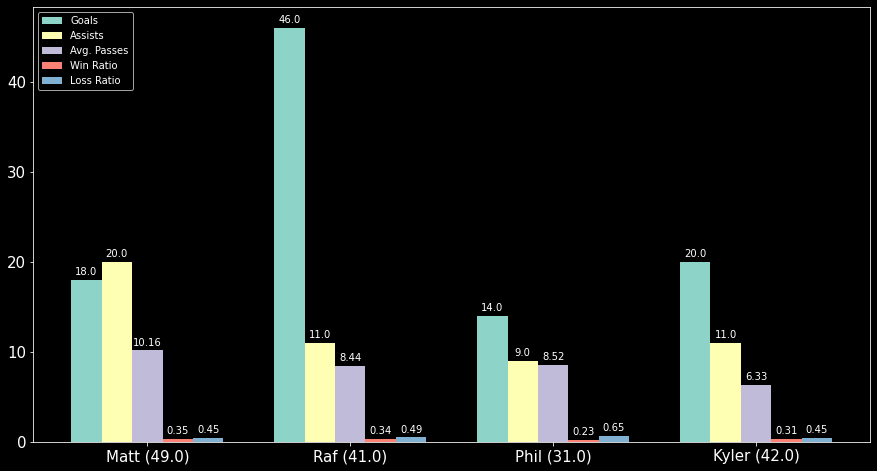

In [131]:
fig, ax = plt.subplots(figsize = (15,8))

x = np.arange(len(pros_df.loc['mean_rating'].index))
width = 0.15  # the width of the bars
plt.rcParams["font.size"] = "10"

rects1 = ax.bar(x-width*2, pros_df.loc['total_goals'].values, width=width, label='Goals')
rects2 = ax.bar(x-width, pros_df.loc['total_assists'].values, width=width, label='Assists')
rects3 = ax.bar(x, pros_df.loc['mean_passesmade'].values, width=width, label='Avg. Passes')
rects4 = ax.bar(x+width, pros_df.loc['ratio_win'].values, width=width, label='Win Ratio')
rects5 = ax.bar(x+width*2, pros_df.loc['ratio_loss'].values, width=width, label='Loss Ratio')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x)
ax.set_xticklabels(player_labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

### Ratings and Man of the Match awards

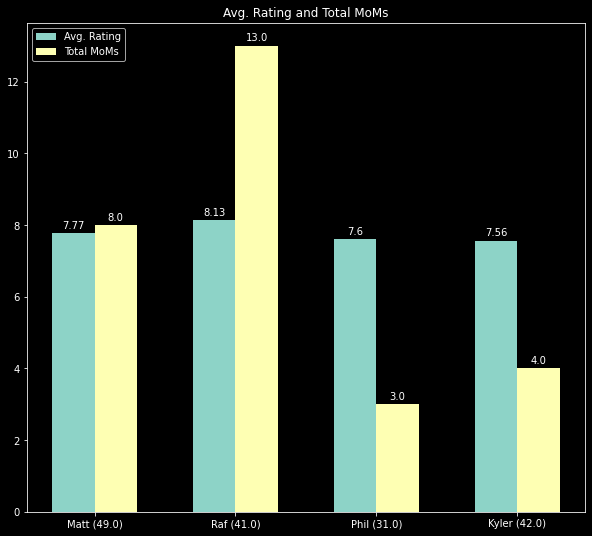

In [132]:
fig, ax = plt.subplots(figsize = (10,9))

x = np.arange(len(pros_df.loc['mean_rating'].index))  # the label locations
width = 0.3  # the width of the bars

rects1 = ax.bar(x-width/2, pros_df.loc['mean_rating'].values, width=width, label='Avg. Rating', zorder=10)
rects2 = ax.bar(x+width/2, pros_df.loc['total_mom'].values, width=width, label='Total MoMs')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Avg. Rating and Total MoMs')
ax.set_xticks(x)
ax.set_xticklabels(player_labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)


### Pass and Goal Attempt Ratios

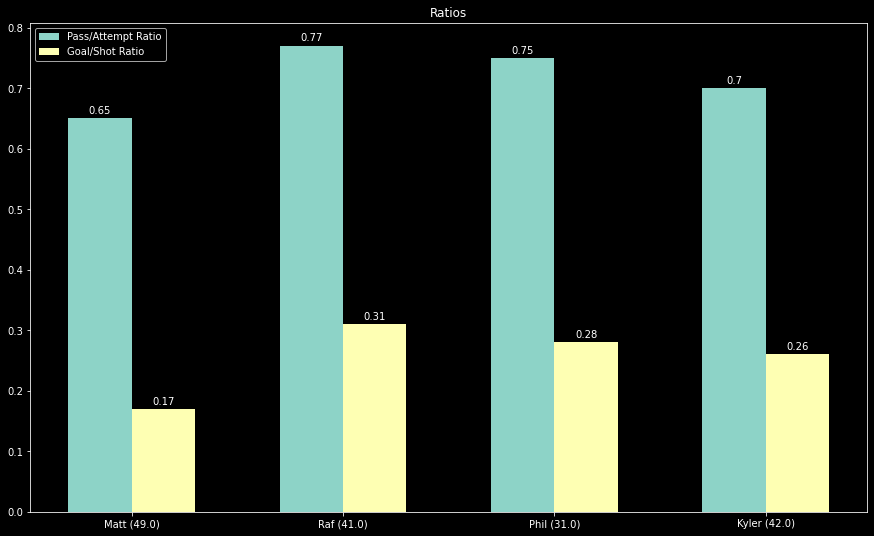

In [133]:
fig, ax = plt.subplots(figsize = (15,9))
#         'ratio_goals', 'ratio_passes', 'ratio_tackles', 'ratio_win', 'ratio_loss'

x = np.arange(len(pros_df.loc['mean_rating'].index))  # the label locations
width = 0.3  # the width of the bars

rects1 = ax.bar(x-width/2, pros_df.loc['ratio_passes'].values, width=width, label='Pass/Attempt Ratio', zorder=10)
rects2 = ax.bar(x+width/2, pros_df.loc['ratio_goals'].values, width=width, label='Goal/Shot Ratio', zorder=10)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Ratios')
ax.set_xticks(x)
ax.set_xticklabels(player_labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)

## Exploring Different Metrics

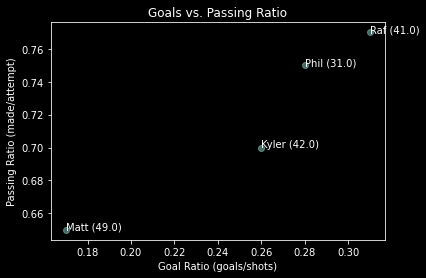

In [134]:
x = pros_df.loc['ratio_goals']
y = pros_df.loc['ratio_passes']

fig, ax = plt.subplots()
ax.set_title('Goals vs. Passing Ratio')
plt.xlabel("Goal Ratio (goals/shots)")
plt.ylabel("Passing Ratio (made/attempt)")
ax.scatter(x, y, alpha=0.5)
for i in range(0, len(players)):
    ax.annotate(player_labels[i], (x[i], y[i]))
plt.show()

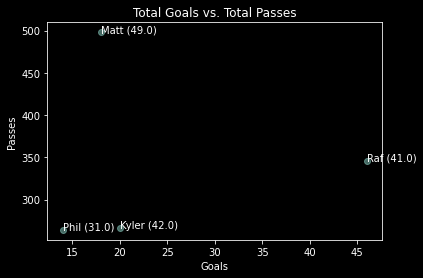

In [137]:
x = pros_df.loc['total_goals']
y = pros_df.loc['total_passesmade']
colors = np.random.rand(2)

fig, ax = plt.subplots()
ax.set_title("Total Goals vs. Total Passes")
plt.xlabel("Goals")
plt.ylabel("Passes")
ax.scatter(x, y, alpha=0.5)
for i in range(0, len(players)):
    ax.annotate(player_labels[i], (x[i], y[i]))
plt.show()

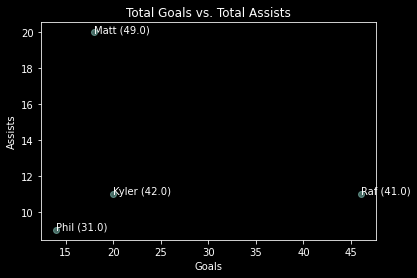

In [138]:
x = pros_df.loc['total_goals']
y = pros_df.loc['total_assists']
colors = np.random.rand(2)

fig, ax = plt.subplots()
ax.set_title("Total Goals vs. Total Assists")
plt.xlabel("Goals")
plt.ylabel("Assists")
ax.scatter(x, y, alpha=0.5)
for i in range(0, len(players)):
    ax.annotate(player_labels[i], (x[i], y[i]))
plt.show()

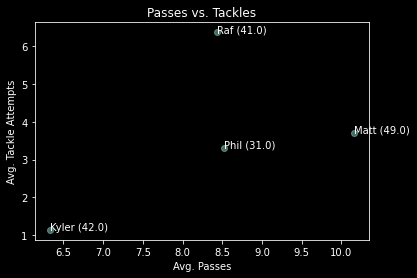

In [140]:
x = pros_df.loc['mean_passesmade']
y = pros_df.loc['mean_tackleattempts']

fig, ax = plt.subplots()
ax.set_title("Passes vs. Tackles")
plt.xlabel("Avg. Passes")
plt.ylabel("Avg. Tackle Attempts")
ax.scatter(x, y, alpha=0.5)
for i in range(0, len(players)):
    ax.annotate(player_labels[i], (x[i], y[i]))
plt.show()

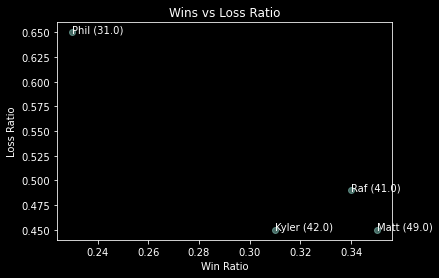

In [146]:
x = pros_df.loc['ratio_win']
y = pros_df.loc['ratio_loss']

fig, ax = plt.subplots()
ax.set_title("Wins vs Loss Ratio")
plt.xlabel("Win Ratio")
plt.ylabel("Loss Ratio")
ax.scatter(x, y, alpha=0.5)
for i in range(0, len(players)):
    ax.annotate(player_labels[i], (x[i], y[i]))
plt.show()

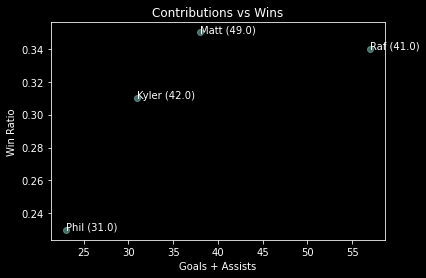

In [142]:
x = pros_df.loc['total_goals'] + pros_df.loc['total_assists']
y = pros_df.loc['ratio_win']

fig, ax = plt.subplots()
ax.set_title("Contributions vs Wins")
plt.xlabel("Goals + Assists")
plt.ylabel("Win Ratio")
ax.scatter(x, y, alpha=0.5)
for i in range(0, len(players)):
    ax.annotate(player_labels[i], (x[i], y[i]))
plt.show()